In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
file1 = pd.read_csv("D:\Datascience_code\Dataset\combined_cycle_power_plant.csv",sep=';')
file1.dtypes

temperature          float64
exhaust_vacuum       float64
ambient_pressure     float64
relative_humidity    float64
energy_output        float64
dtype: object

In [17]:
file1.columns

Index(['temperature', 'exhaust_vacuum', 'ambient_pressure',
       'relative_humidity', 'energy_output'],
      dtype='object')

In [18]:
col = file1.columns.tolist()

In [19]:
col

['temperature',
 'exhaust_vacuum',
 'ambient_pressure',
 'relative_humidity',
 'energy_output']

In [20]:
file1.isnull().sum()

temperature          0
exhaust_vacuum       0
ambient_pressure     0
relative_humidity    0
energy_output        0
dtype: int64

count    9568.000000
mean       19.651231
std         7.452473
min         1.810000
25%        13.510000
50%        20.345000
75%        25.720000
max        37.110000
Name: temperature, dtype: float64


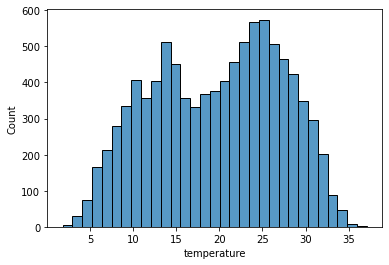

count    9568.000000
mean       54.305804
std        12.707893
min        25.360000
25%        41.740000
50%        52.080000
75%        66.540000
max        81.560000
Name: exhaust_vacuum, dtype: float64


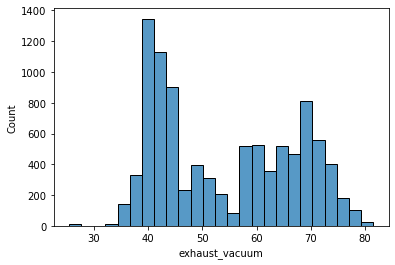

count    9568.000000
mean     1013.259078
std         5.938784
min       992.890000
25%      1009.100000
50%      1012.940000
75%      1017.260000
max      1033.300000
Name: ambient_pressure, dtype: float64


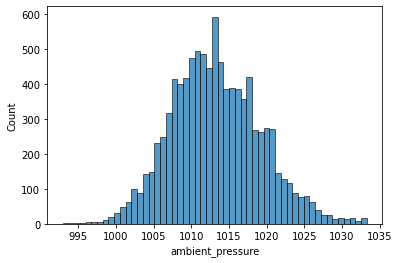

count    9568.000000
mean       73.308978
std        14.600269
min        25.560000
25%        63.327500
50%        74.975000
75%        84.830000
max       100.160000
Name: relative_humidity, dtype: float64


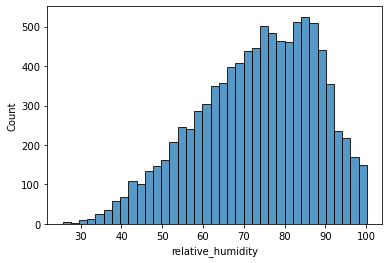

count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: energy_output, dtype: float64


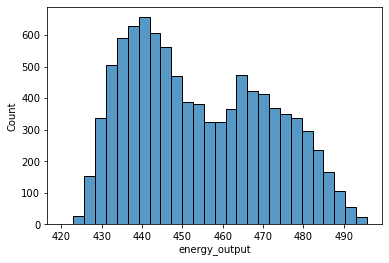

In [22]:
for i in col:
    print(file1[i].describe())
    sns.histplot(x=i,data=file1)
    plt.show()

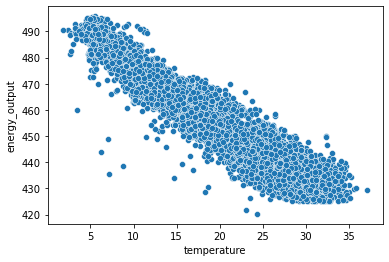

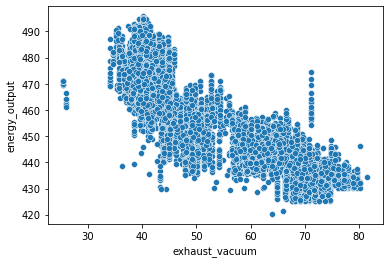

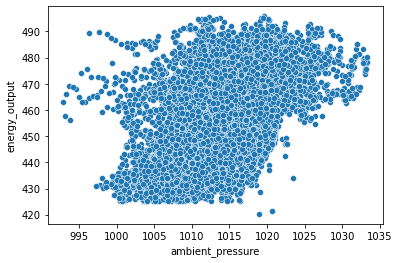

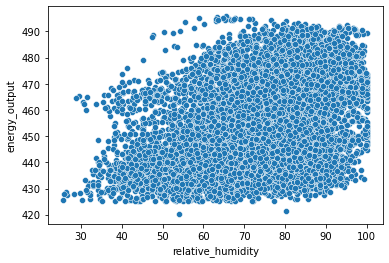

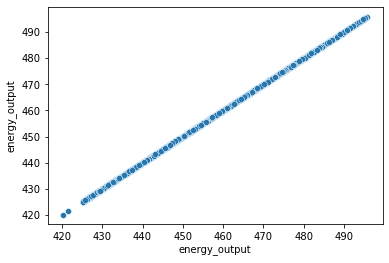

In [24]:
for i in col:
    sns.scatterplot(x=i,y='energy_output',data=file1)
    plt.show()

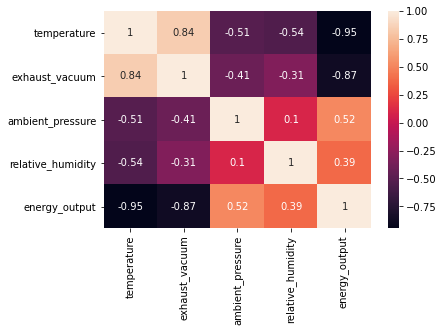

In [26]:
cor = file1.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [27]:
x = file1.drop('energy_output',axis=1)
x.head()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00


In [30]:
y=file1['energy_output']
y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_output, Length: 9568, dtype: float64

In [33]:
x.shape
y.shape

(9568,)

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [38]:
xtrain.shape
xtest.shape
ytrain.shape
ytest.shape

(1914,)

In [39]:
from sklearn.linear_model import LinearRegression
algo = LinearRegression()
algo.fit(xtrain,ytrain)

LinearRegression()

In [40]:
algo.coef_

array([-1.98910604, -0.23165816,  0.05531992, -0.16072   ])

In [41]:
algo.intercept_

461.7671777888529

In [44]:
ypred=algo.predict(xtest)
ypred

array([448.25352776, 479.18330723, 439.8367082 , ..., 470.1625013 ,
       479.59310988, 435.07398   ])

In [45]:
ytest

6142    445.36
3846    487.79
6463    437.10
8357    481.40
2790    455.13
         ...  
6814    449.11
6619    488.17
3569    468.43
6169    472.77
45      440.28
Name: energy_output, Length: 1914, dtype: float64

In [43]:
from sklearn.metrics import r2_score
print(r2_score(ytest,ypred))

0.9314559912704217
